[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/rotate_affine.ipynb)

# Rotate image using warp affine transform

In this tutorial we are going to learn how to rotate an image using the `kornia.gemetry` components.

In [ ]:
%%capture
!pip install kornia

In [ ]:
%%capture
!wget https://github.com/kornia/data/raw/main/bennett_aden.png

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


We use OpenCV to load an image to memory represented in a numpy.ndarray

In [ ]:
img_bgr: np.ndarray = cv2.imread("bennett_aden.png", cv2.IMREAD_COLOR)

Convert the numpy array to torch

In [ ]:
x_img: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxW
x_img = x_img[None, ...].float() / 255.0
x_img = K.color.bgr_to_rgb(x_img)

In [ ]:
def imshow(input: torch.Tensor, size: tuple = None):
    out = torchvision.utils.make_grid(input, nrow=4, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.figure(figsize=size)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

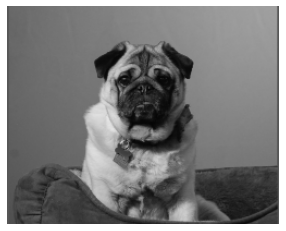

In [ ]:
imshow(x_img)

## Define the rotation matrix

In [ ]:
# create transformation (rotation)
alpha: float = 45.0  # in degrees
angle: torch.tensor = torch.ones(1) * alpha

# define the rotation center
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = x_img.shape[3] / 2  # x
center[..., 1] = x_img.shape[2] / 2  # y

# define the scale factor
scale: torch.tensor = torch.ones(1, 2)

# compute the transformation matrix
M: torch.tensor = K.geometry.get_rotation_matrix2d(center, angle, scale)  # 1x2x3

## Apply the transformation to the original image

/usr/local/lib/python3.7/dist-packages/kornia/geometry/transform/imgwarp.py:184: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)


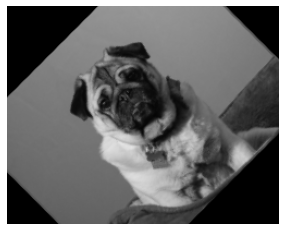

In [ ]:
_, _, h, w = x_img.shape
x_warped: torch.tensor = K.geometry.warp_affine(x_img, M, dsize=(h, w))

imshow(x_warped)

## Rotate a batch of images

/usr/local/lib/python3.7/dist-packages/kornia/geometry/transform/imgwarp.py:184: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)


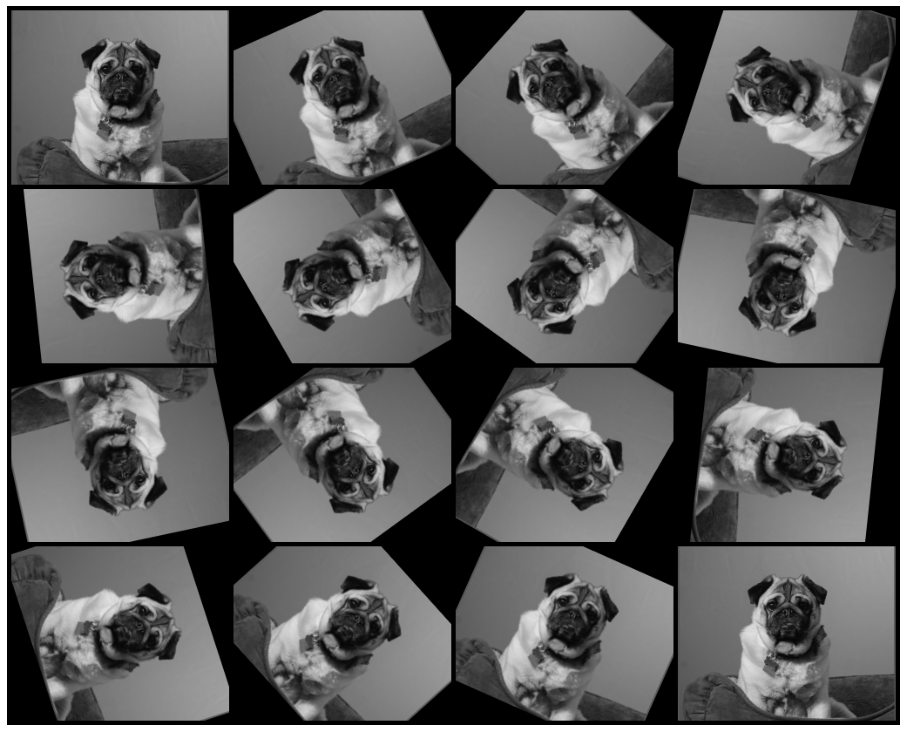

In [ ]:
x_batch = x_img.repeat(16, 1, 1, 1)
x_rot = K.geometry.rotate(x_batch, torch.linspace(0.0, 360.0, 16))

imshow(x_rot, (16, 16))